# Parsing Dates

How to work with dates in Python and Pandas.

In [2]:
# Module Importations
import datetime
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Constants
np.random.seed(0)   # Set seed for reproducibility

In [4]:
# Load data
file_string = r'C:/Developer/scratch-pad-python/Datasets/landslides_data.csv'

landslides_df = pd.read_csv(file_string)

In [5]:
# Peek dataset
landslides_df.head(5)

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [6]:
# Check the datatype of the date column
landslides_df['date'].dtype     # Checking numpy documentation shows that 'O' is an object (not datetime) 

dtype('O')

# Convert Date Columns to Datetime

Pandas has a parsing function that takes the date format as an input.

If an error is encountered with multiple date formats, panda's formatter can be instructed to infer date format. However, this is slower than specifying the date.

In [7]:
# Create a new column with parsed dates
landslides_df['parsed_dates'] = pd.to_datetime(landslides_df['date'], format = '%m/%d/%y')

In [8]:
# Check the parsing
landslides_df['parsed_dates'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: parsed_dates, dtype: datetime64[ns]

# Selecting the Day of the Month

In [9]:
# Get the day of the month from the parsed date
day_of_month = landslides_df['parsed_dates'].dt.day
day_of_month.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: parsed_dates, dtype: float64

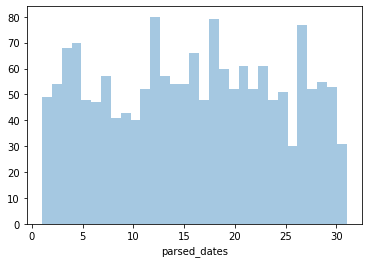

In [11]:
# Plot the Day of Month (to check parsing)

# Remove na's
day_of_month = day_of_month.dropna()

# Plot day of month as distribution (should be even between 1 - 31)
sns.distplot(day_of_month, kde = False, bins = 31)